In [5]:
# Cài đặt thư viện
!pip install keras==2.2.4
# Sử dụng TF 1.x
%tensorflow_version 1.x

     |████████████████████████████████| 317kB 2.7MB/s 
  Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1
TensorFlow 1.x selected.


In [6]:
# Check GPU
import tensorflow as tf
from tensorflow.python.client import device_lib

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12505897770899211204
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 13769175029965869600
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 3949316123871271396
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15956161332
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2488158016536358362
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
]


In [7]:
# Mount đến drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [18]:
# Tải mã nguồn yolov3 keras từ github
%cd /content/gdrive/My\ Drive
%mkdir colab
%cd /content/gdrive/My\ Drive/colab
!rm -rf keras-yolo3
!git clone https://github.com/roboflow-ai/keras-yolo3
%cd /content/gdrive/My\ Drive/colab/keras-yolo3

/content/gdrive/My Drive
mkdir: cannot create directory ‘colab’: File exists
/content/gdrive/My Drive/colab
Cloning into 'keras-yolo3'...
remote: Enumerating objects: 169, done.
remote: Total 169 (delta 0), reused 0 (delta 0), pack-reused 169
Receiving objects: 100% (169/169), 172.74 KiB | 4.54 MiB/s, done.
Resolving deltas: 100% (80/80), done.
/content/gdrive/My Drive/colab/keras-yolo3


In [19]:
# Giải nén dữ liệu
!rm -rf /content/gdrive/My\ Drive/colab/keras-yolo3/data_unzip
!unzip /content/gdrive/My\ Drive/colab/data/BCCD.v1-resize-416x416-manual.yolokeras.zip -d /content/gdrive/My\ Drive/colab/keras-yolo3/data_unzip

Archive:  /content/gdrive/My Drive/colab/data/BCCD.v1-resize-416x416-manual.yolokeras.zip
   creating: /content/gdrive/My Drive/colab/keras-yolo3/data_unzip/test/
  inflating: /content/gdrive/My Drive/colab/keras-yolo3/data_unzip/test/BloodImage_00038_jpg.rf.63da20f3f5538d0d2be8c4633c7034a1.jpg  
  inflating: /content/gdrive/My Drive/colab/keras-yolo3/data_unzip/test/BloodImage_00044_jpg.rf.b0e2369642c5a7fa434ed8defa79e2ba.jpg  
  inflating: /content/gdrive/My Drive/colab/keras-yolo3/data_unzip/test/BloodImage_00062_jpg.rf.e965ee152eea462d82706a2709abfe00.jpg  
  inflating: /content/gdrive/My Drive/colab/keras-yolo3/data_unzip/test/BloodImage_00090_jpg.rf.4fd1da847d2857b6092003c41255ea4c.jpg  
  inflating: /content/gdrive/My Drive/colab/keras-yolo3/data_unzip/test/BloodImage_00099_jpg.rf.5b178d758af2a97d3df8e5f87b1f344a.jpg  
  inflating: /content/gdrive/My Drive/colab/keras-yolo3/data_unzip/test/BloodImage_00112_jpg.rf.f8d86689750221da637a054843c72822.jpg  
  inflating: /content/gdriv

In [20]:
# Chuyen tat ca file trong data_unzip/train sang thu muc goc keras-yolo3
%cd /content/gdrive/My\ Drive/colab/keras-yolo3/data_unzip/train
%mv * /content/gdrive/My\ Drive/colab/keras-yolo3

/content/gdrive/My Drive/colab/keras-yolo3/data_unzip/train


In [21]:
# Tính số class trong bộ dữ liệu
%cd /content/gdrive/My\ Drive/colab/keras-yolo3
def file_len(fname):
  with open(fname) as f:
    for i, l in enumerate(f):
      pass
  return i + 1

num_classes = file_len('_classes.txt')
print(num_classes)

/content/gdrive/My Drive/colab/keras-yolo3
3


In [22]:
# Tải bộ trọng số pretrained của yolov3 
!rm -rf yolov3.weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-07-30 06:52:09--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   447KB/s    in 12m 30s 

2020-07-30 07:04:40 (323 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [23]:
# Chuyển bộ trọng số trên sang định dạng *.h5 
!python convert.py -w yolov3.cfg yolov3.weights model_data/yolo.h5

Using TensorFlow backend.
Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.


Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)




2020-07-30 07:04:44.129484: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2020-07-30 07:04:44.129716: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x2030a00 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-07-30 07:04:44.129747: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-07-30 07:04:44.131601: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-07-30 07:04:44.229422: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node

- Stage 1:
  Epochs = 300,
  Batch size = 32,
  Learning rate = 1e-3,
- Stage 2:
  Epochs = 100,
  Batch size = 16,
  Learning rate = 1e-4,

In [28]:
# Train model, sử dụng file pretrained yolo.h5 vừa convert ở trên, trong thư mục model_data/
# Thực hiện train 300 epochs với các frozen layers đầu tiên.
# Train tiếp 100 epochs với tất cả các layers được unfreeze, có sử dụng early_stopping
%cd /content/gdrive/My\ Drive/colab/keras-yolo3
!python train.py

/content/gdrive/My Drive/colab/keras-yolo3
Using TensorFlow backend.
-------------------CLASS NAMES-------------------
['Platelets', 'RBC', 'WBC']
-------------------CLASS NAMES-------------------








2020-07-30 07:17:32.695675: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2020-07-30 07:17:32.695887: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x166ca00 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-07-30 07:17:32.695918: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-07-30 07:17:32.708856: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-07-30 07:17:32.805609: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
20

In [40]:
# Lấy ngẫu nhiên một ảnh từ tập test của bộ dữ liệu
# Lưu đường dẫn vào biến img_path
%cd /content/gdrive/My\ Drive/colab/keras-yolo3
import os
test_images = [f for f in os.listdir('data_unzip/test') if f.endswith('.jpg')]
import random
img_path = "data_unzip/test/" + random.choice(test_images);

print(img_path)

/content/gdrive/My Drive/colab/keras-yolo3
data_unzip/test/BloodImage_00099_jpg.rf.5b178d758af2a97d3df8e5f87b1f344a.jpg


Using TensorFlow backend.
Image detection mode
 Ignoring remaining command line arguments: ./path2your_video,



2020-07-30 09:06:20.621603: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2020-07-30 09:06:20.621844: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x263ca00 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-07-30 09:06:20.621877: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-07-30 09:06:20.623864: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-07-30 09:06:20.723759: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-07-30 09:06:20.724780: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x26

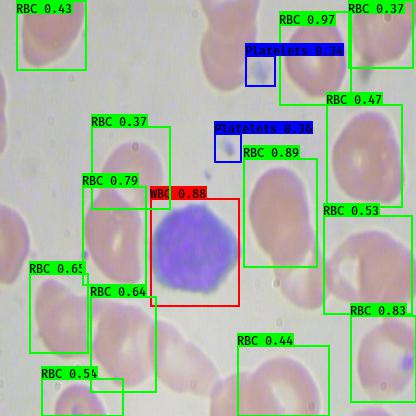

In [41]:
# Thực hiện detect bằng bộ trọng số ta vừa train được
# --model: Đường dẫn đến mô hình
# --classes: Đường dẫn đến file classes
# --image: Cờ đánh dấu ta đang predict trên ảnh
# --image_path: Tham số này được viết thêm so với bản gốc, dùng để đưa đường dẫn đến ảnh input.

!python yolo_video.py --model="./logs/000/trained_weights_final.h5" --classes="_classes.txt" --image --image_path={img_path}
from IPython.display import Image
Image('predictions.jpg')